<a href="https://colab.research.google.com/github/MathieuSpi/COVID-19/blob/master/Evolution_of_Covid19_in_Portugal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importation of the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files

In [2]:
#importation of the 3 files containing data 
uploaded = files.upload()

Saving time_series_covid19_confirmed_global.csv to time_series_covid19_confirmed_global.csv
Saving time_series_covid19_deaths_global.csv to time_series_covid19_deaths_global.csv
Saving time_series_covid19_recovered_global.csv to time_series_covid19_recovered_global.csv


In [3]:
#Creation of the table of recorded cases, deaths and recoveries in Portugal since January 22nd
Confirmed = pd.read_csv(io.BytesIO(uploaded['time_series_covid19_confirmed_global.csv']))
Deaths = pd.read_csv(io.BytesIO(uploaded['time_series_covid19_deaths_global.csv']))
Recovered = pd.read_csv(io.BytesIO(uploaded['time_series_covid19_recovered_global.csv']))

Portugal_Confirmed = Confirmed.loc[Confirmed['Country/Region']=="Portugal",:] 
Portugal_Confirmed.index = ["Portugal Confirmed"]
Portugal_Confirmed = Portugal_Confirmed.drop (['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)

Portugal_Deaths = Deaths.loc[Deaths["Country/Region"]=="Portugal",:]
Portugal_Deaths.index = ["Portugal Death"]
Portugal_Deaths = Portugal_Deaths.drop (['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)

Portugal_Recovered = Recovered.loc[Recovered["Country/Region"]=="Portugal",:]
Portugal_Recovered.index = ["Portugal Recovered"]
Portugal_Recovered = Portugal_Recovered.drop (['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)

Portugal_Total = pd.concat([Portugal_Confirmed, Portugal_Deaths, Portugal_Recovered]) 
Portugal_Total.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Portugal Confirmed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,5,8,13,20,30,30,41,59,59,112,169,245,331,448,448,785,1020,1280,1600,2060,2362,2995,3544,4268,5170,5962,6408,7443,8251,9034
Portugal Death,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,6,12,14,23,33,43,60,76,100,119,140,160,187,209
Portugal Recovered,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,3,5,5,5,5,22,22,43,43,43,43,43,43,43,68


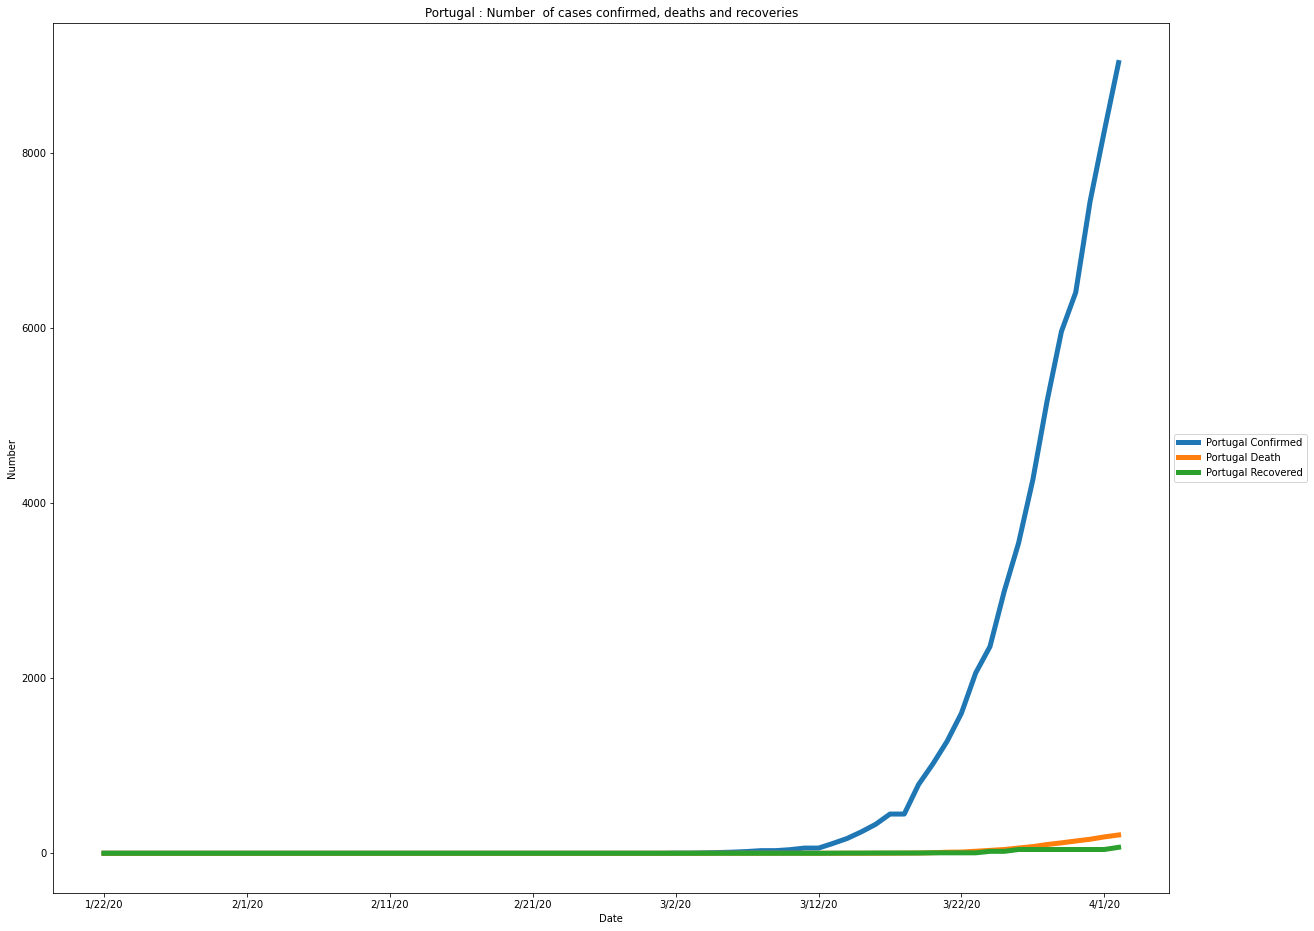

In [4]:
#Creation of the curve of total cases, deaths and recoveries in Portugal
Portugal_Total_transposed = Portugal_Total.transpose();
Portugal_Total_transposed.fillna(0).plot(title=("Portugal : Number  of cases confirmed, deaths and recoveries"), figsize=(20,16), lw=5)
plt.xlabel('Date')
plt.ylabel('Number')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

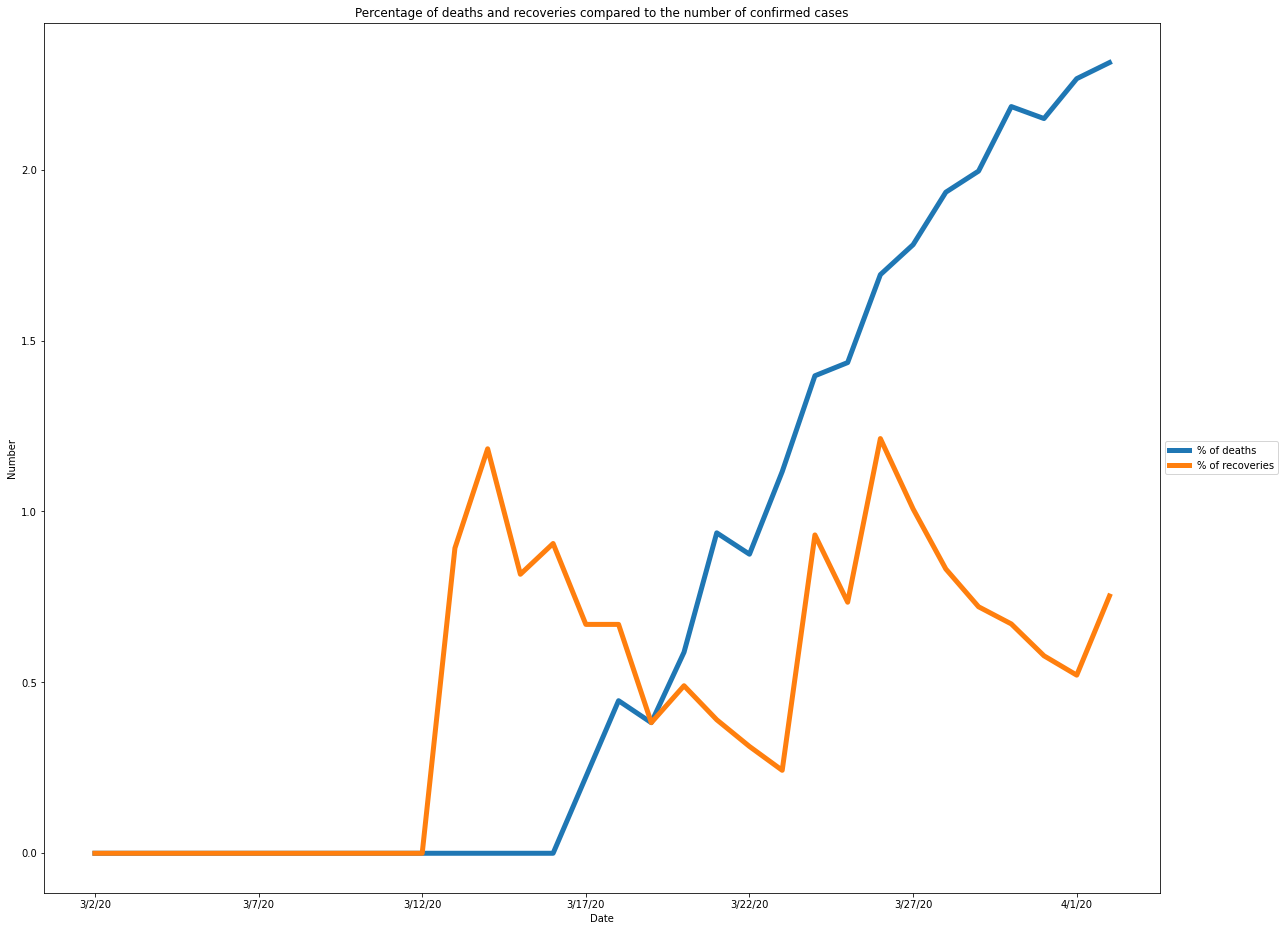

In [5]:
#Creation of the curve of the percentage of deaths and recoveries compared to the number of confirmed cases in Portugal
Percentage_Portugal = {"% of deaths":[], "% of recoveries":[]}
Percentage_Index_Portugal = []
C = 0

for ligne in Portugal_Total_transposed.iterrows():

  Confirmed_Value = int(Portugal_Total_transposed['Portugal Confirmed'][C])

  if not (Confirmed_Value == 0):
    Death_Value = int(Portugal_Total_transposed['Portugal Death'][C])
    Recovered_Value = int(Portugal_Total_transposed['Portugal Recovered'][C])
    Percentage_Portugal["% of deaths"].append(Death_Value*100/Confirmed_Value)
    Percentage_Portugal["% of recoveries"].append(Recovered_Value*100/Confirmed_Value)
    Percentage_Index_Portugal.append(Portugal_Total_transposed.index[C])

  C += 1

Total_percentage_Portugal = pd.DataFrame(Percentage_Portugal, index = Percentage_Index_Portugal)
Total_percentage_Portugal.plot(title=("Percentage of deaths and recoveries compared to the number of confirmed cases"), figsize=(20,16), lw=5)
plt.xlabel('Date')
plt.ylabel('Number')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [0]:
#As we can see from Portugal, the number of people contaminated is increasing every day, and very fast. It is maybe because of a lack
# of the decision making in the beginning of the epidemic.
# Furthermore, many people are dying compared to the people who are healed.